# Black-Scholes-Merton pricing

**Objectives**
- State and explain the assumptions of the Black-Scholes-Merton model.
- State the PDE and explain greeks
- Introduce a closed-form solution for European put/call options
- Provide derivation sketches for the PDE aswell as the closed form solutions for easy validation.
- Use `option_pricing.pricing_bs` to price calls and puts.
- Verify the implementation against textbook examples (e.g. Hull).

**References**
- Shreve, *Stochastic Calculus for Finance II*, Black–Scholes chapters.
- Hull, *Options, Futures, and Other Derivatives*, chapters on BS formula and Greeks.


## Imports and configuration

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from option_pricing.pricing_bs import bs_call, bs_put, finite_diff_greeks, sweep_x

np.random.seed(0)


## BSM assumptions and PDE
(1–2 paragraphs: market assumptions, no arbitrage, continuous trading, etc.)
Hull!!!!
**Assumptions:**
- Continuous trading
- No transaction costs
- No payed dividends during the lifetime of the option
- Constant interest rate $r$
- We are in a no arbitrage environment (what does this mean exactly?)
- Stock price follows a GBM as defined in notebook02 with constant drift $\mu$ and constant volatility $\sigma$


**PDE:**
(High-level story: replication → PDE → solution; minimal equations.)
We want to price a European option written on a stock whose price we model as a geometric Brownian motion (GBM). That is, we assume
$$
dS_t = \mu S_t\,dt + \sigma S_t\,dW_t,
$$
in a frictionless market with constant volatility $\sigma$ and risk-free rate $r$. Our goal is to find a price for the option that does not create arbitrage opportunities. To do this, we consider an investor who holds a portfolio consisting of $\Delta_t$ units of the stock and some amount in the risk-free asset (bond or bank account). By choosing $\Delta_t$ appropriately, we can construct a self-financing portfolio that replicates the option’s payoff. No-arbitrage then implies that the value of this replicating portfolio must equal the option price at all times. Imposing this condition leads to the Black–Scholes partial differential equation for the option value.

Maybe give a small example to make no arbitrage intuitive??

$$
\frac{\partial V}{\partial t}
+ \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}
+ r S \frac{\partial V}{\partial S}
- r V = 0,
$$

**Greeks**

## BSM closed form solution
In this section we present the closed form solution for a european call/put option.

1. For the price of european call option $c(t, x)$ with payoff, $(x-K)^+$ the closed form solution is given by:
    $$
    c(t,x) = x N(d_{+}(T-t, x)) - K e^{-r(T-t)} N(d_{-}(T-t, x)), \quad 0 \leq t < T, x > 0
    $$
    Where
    $$
    d_{\pm}(\tau, x) = \frac{1}{\sigma\sqrt{\tau}} \left[ \log \frac{x}{K} + \left(r \pm \frac{\sigma^2}{2}\right) \tau \right]
    $$
    and $N$ is the cumulative standard normal distribution. We also define $\tau=T-t$ as the time to expiration date. 

2. For the price of european put option $p(t, x)$, with payoff $(K-x)^+$ the closed form solution is by:
    $$ p(t, x) = K e^{-r(T-t)} N(-d_{-}(T-t, x)) - x N(-d_{+}(T-t, x))$$
    Source: Steve E shreve finance Vol II

**Intuitive explanation of terms:**
1. $K$ Strike price, the time to be paid at time T if the option is exercised
1. $Ke^{-r(T-t)}$ Present value of K at time t
1. $d_{+}(T-t, x)$
1. $d_{-}(T-t, x)$
1. $N(d_{+}(T-t, x))$
1. $N(d_{-}(T-t, x))$

**Poperties of the solution**

Lets take the closed form solution for a european call option $c(t,x)$. We will see that the solution is backed up by our intuition. If we were to let the stock price approach a very large value, the option ends almost surely _in the money_, and the formula reflects this as $N(d_{-})$ approaches 1. The formula then becomes:
$$c(t, S(t)) = S(t) - Ke^{-r(T-t)}$$

If the stockprice were to plummet, the option is unlikely to end in the money and we observe $\frac{x}{K}<<1$, then $N(d_\pm) \rightarrow 0$.

If we know look at the same situations but for the put formula, we observe the converse. Let x approach a large value and $p$ goes to:
$$p(t, S(t)) = Ke^{-r(T-t)} - S(t)$$

put/call parity?

## BSM put/call implementation

## Num checks VS book ex?

- Reproduce one or two Hull tables.
- Compare your prices to book values.


The stock price 6 months from the expiration of an option is $42, the exercise price
of the option is $40, the risk-free interest rate is 10% per annum, and the volatility
is 20% per annum. 

In [2]:
S_0 = 42
K = 40
r = 0.1
sigma = 0.2
t=0
T = t+0.5
c = bs_call(t=t, x=S_0, K=K, r=r, sigma=sigma, T=T)
p = bs_put(t=t, x=S_0, K=K, r=r, sigma=sigma, T=T)
print(c, p)

4.759422392871532 0.8085993729000922


## Interpretation and Connection to Earlier Notebooks
- Link back to GBM and risk-neutral pricing.
- Brief finance intuition.


## FDM greek computation
Here we apply finite differences to bs_call using the values of the previous numerical example, to analyze how varying $x$ ($=S_0$) affects the greeks.

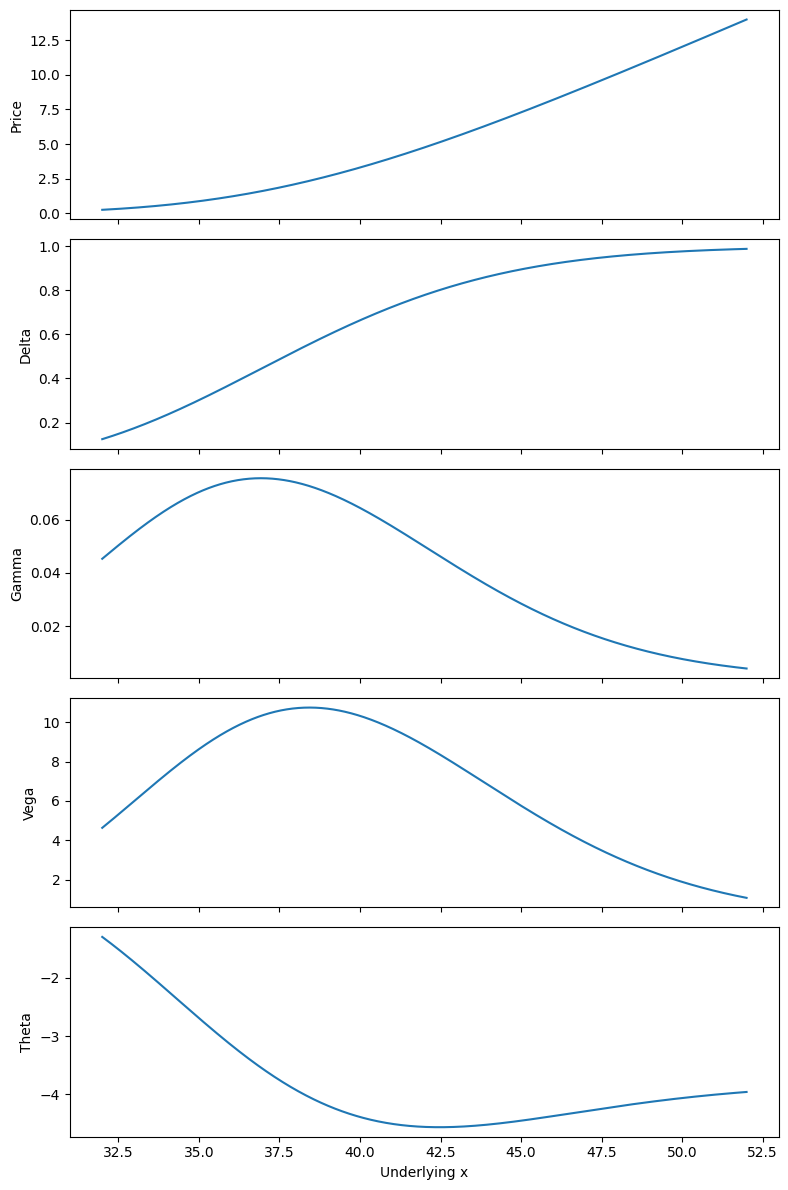

In [3]:
greeks_dict = finite_diff_greeks(t, S_0, K, r, sigma, T)

sweep_x(t=t, K=K, r=r, sigma=sigma, T=t+0.5, x_min=S_0-10, x_max=S_0+10, n=1000)

## Summary and next steps
- Bullet summary.
- Note that next notebooks = Greeks (analytical), binomial/MC, etc.